## Проект 8

# Тема: Логистическая регрессия своими руками для задач с двумя и тремя признаками

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

### Генерация данных для задачи регрессии

In [ ]:
X, y = make_blobs(n_samples = 50, centers = 2,
               cluster_std = 1.5, n_features = 2,
                  random_state=42)

Выведим первые пять строк признаков:

In [ ]:
X[:5]

array([[ 4.58613978,  4.32013517],
       [-3.41175754, 11.7927034 ],
       [-4.5014767 ,  9.30957798],
       [-2.40790532,  6.87716385],
       [-4.0284443 ,  9.48565713]])

Выведим значения целевой переменной:

In [ ]:
y

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0])

Визуализируем сгенерироавнные данные на диаграмме рассеивания, подкрасив классы разными цветами.

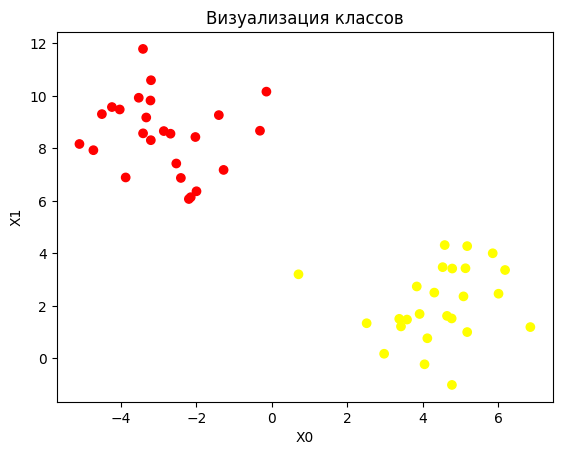

In [ ]:
plt.scatter(X[:, 0], X[:, 1],  c=y, cmap='autumn')
plt.xlabel('X0')
plt.ylabel('X1')
plt.title("Визуализация классов")
plt.show()

### 1. Сгенерируйте данные и значения целевой переменной для задачи классификации с 2 признаками и 100 наблюдениями. Представьте признаки в виде датафрейма, выведите его первые 10 строк и описательную статистику. Целевую переменную представьте в виде серии и выведите количество элементов в каждом классе.
Указание: Для этого воспользуйтесь [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), задав параметры: число строк n_samples=100, число признаков n_features=2, количество классов centers = 2, стандартное отклонение групп точек cluster_std = 0.7 (отвечает за удалённость друг от друга классов), а также фиксируем воспроизводимость случайных данных random_state=0.

In [ ]:
X, y = make_blobs(n_samples = 100, centers = 2,
               cluster_std = 0.7, n_features = 2,
                  random_state=0)

In [ ]:
df=pd.DataFrame(X, columns=['X1','X2'])

In [ ]:
df.head(10)

,X1,X2
0,3.569533,1.833233
1,1.252039,0.591190
2,0.099313,4.848031
3,0.354820,2.917230
4,2.886888,1.119523
5,1.302234,3.228417
6,1.008301,4.172759
7,3.401327,1.934024
8,0.705141,4.092175
9,1.492881,0.414979


In [ ]:
df2=pd.Series(y)

In [ ]:
df.describe()

,X1,X2
count,100.000000,100.000000
mean,1.501012,2.685094
std,0.894884,1.797777
min,-0.810823,-0.658719
25%,1.002131,1.110792
50%,1.500939,2.587714
75%,2.033131,4.354567
max,3.723469,5.669330


In [ ]:
df2.describe()

,0
count,100.000000
mean,0.500000
std,0.502519
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
df2.value_counts()

,count
1,50
0,50


### 2. Визуализируйте сгенерироавнные данные на диаграмме рассеивания, подкрасив классы разными цветами. Подпишите классы.

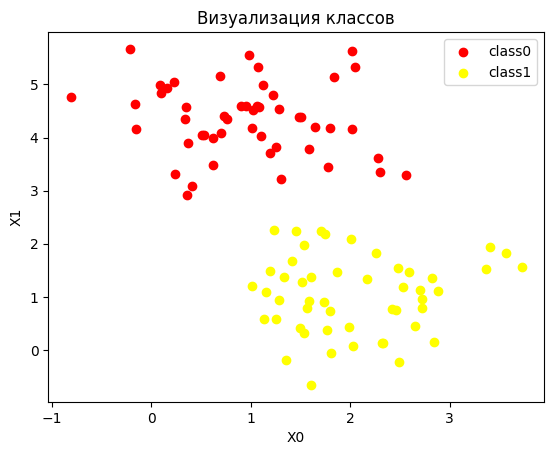

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0],  c='red',label='class0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1],  c='yellow',label='class1')
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.title("Визуализация классов")
plt.show()

### 3. Напишите функцию сигмоида $\sigma(z) = \dfrac{1}{1 + e^{- z}}.$ Вычислите её значения на случайном векторе длины 100.

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
Z0 = np.random.randn(100)
sigmoid(Z0)

array([0.28602774, 0.70229235, 0.5235661 , 0.18453733, 0.13004236,
       0.2427651 , 0.14653517, 0.42834096, 0.74038724, 0.56216605,
       0.51172397, 0.26264948, 0.59945281, 0.33535592, 0.7794256 ,
       0.11862075, 0.41774668, 0.42651105, 0.09811376, 0.45425258,
       0.59683819, 0.56011648, 0.52596061, 0.30373575, 0.62075626,
       0.52251297, 0.26941994, 0.31001734, 0.55158469, 0.62795718,
       0.33194642, 0.71375789, 0.33787356, 0.53328184, 0.60513222,
       0.4967877 , 0.41283732, 0.6941231 , 0.62761245, 0.76803697,
       0.40552739, 0.66633653, 0.58755937, 0.74031095, 0.39558479,
       0.02889494, 0.20699141, 0.80620015, 0.55689798, 0.43593809,
       0.51259002, 0.20097513, 0.43495272, 0.45527494, 0.33341703,
       0.75728043, 0.45781124, 0.31779717, 0.3779936 , 0.41025989,
       0.56560957, 0.34759174, 0.38408185, 0.18044122, 0.75168601,
       0.543946  , 0.28082893, 0.71699298, 0.2567757 , 0.291852  ,
       0.87228856, 0.38703789, 0.25180014, 0.72792441, 0.23881

### 4. Напишите функцию, вычисляющую предсказание вероятности того, что значение принадлежит классу единица в случае двух признаков $\vec{p} =\sigma(w_0 + w_1 \vec{x}_1+ w_2 \vec{x}_2)$. Назовите её predict_proba. Вычислите её значения на сгенерированных данных X в случайной точке $w$.

In [ ]:
def predict_proba(w, X):
        return sigmoid(w[0]+w[1]*X[:,0]+w[2]*X[:,1])

In [ ]:
W0 = np.random.rand(3)

In [ ]:
predict_proba(W0,X)

array([0.96379178, 0.84878804, 0.99530958, 0.97491139, 0.9247469 ,
       0.98399203, 0.99273357, 0.96581633, 0.99173659, 0.83353686,
       0.99383702, 0.875735  , 0.99658085, 0.99292208, 0.93246354,
       0.95531108, 0.83433878, 0.99111127, 0.84396424, 0.91628134,
       0.99497976, 0.9934673 , 0.95399942, 0.99570953, 0.89210984,
       0.99491292, 0.82229373, 0.99789452, 0.99502795, 0.9539495 ,
       0.81848302, 0.99467374, 0.88501754, 0.81945802, 0.96323231,
       0.99375808, 0.88936718, 0.96186451, 0.9878418 , 0.90336478,
       0.98190267, 0.99789267, 0.99762546, 0.9905197 , 0.96190071,
       0.92931123, 0.8034789 , 0.77487734, 0.99399388, 0.99682854,
       0.84809602, 0.89586641, 0.99838095, 0.99602379, 0.98795114,
       0.99503641, 0.9881497 , 0.89127904, 0.92235589, 0.77217252,
       0.92394756, 0.99368396, 0.99615311, 0.92402856, 0.99744913,
       0.96471012, 0.98953599, 0.99058391, 0.93768273, 0.99074461,
       0.98933639, 0.83552775, 0.95122129, 0.99455054, 0.97876

### 5. Напишите функцию ошибки (logLoss) логистической регрессии.
Указание: $logLoss(\vec y, \vec p) = -\frac{1}{n}\sum_{i=1}^{n} (y_i \ln (p_i) + (1 - y_i) \ln (1 - p_i))$, где $p_i = \sigma(w_0 + w_1 {x}_{i1}+ w_2 {x}_{i2}).$ Используйте написанную функцию predict_proba.

In [ ]:
def logLoss(w, X, y):
        return -np.mean(y*np.log(predict_proba(w, X)) + (1-y)*np.log(1-predict_proba(w, X)))

In [ ]:
logLoss(W0, X, y)

2.5893216789224476

### 6. Реализуйте функцию, которая вычисляет градиент функции ошибки логистической регрессии с двумя признаками.
Указание: $$ \frac{\partial }{\partial w_0}logLoss(\vec w, X , \vec y) =\frac{1}{n}\sum_{i=1}^{n} (\sigma(w_0 + w_1 x_{i 1}+ w_2 x_{i 2}) - {y}_i)$$
$$\frac{\partial }{\partial w_1}logLoss(\vec w, X, \vec y) =\frac{1}{n}\sum_{i=1}^{n} (\sigma(w_0 + w_1 x_{i 1}+ w_2 x_{i 2}) - {y}_i){x}_{i 1}$$
$$\frac{\partial }{\partial w_2}logLoss(\vec w, X, \vec y) =\frac{1}{n}\sum_{i=1}^{n} (\sigma(w_0 + w_1 x_{i 1}+ w_2 x_{i 2}) - {y}_i){x}_{i 2}$$

In [ ]:
def gradient_logLoss(w, X, y):
    return np.array([np.mean(predict_proba(w, X) - y), np.mean((predict_proba(w, X) - y)*X[:, 0]),  np.mean((predict_proba(w, X) - y)*X[:, 1])])

In [ ]:
gradient_logLoss(W0, X, y)

array([0.44190392, 0.36990906, 2.11775923])

### 7. Создайте класс, реализующий модель логистической регрессии. Найдите оптимальные значения коэффициентов разделяющей гиперплоскости.
Указание: Необходимо создать класс, реализующий метод градиентного спуска для logLoss функции.
Воспользуйтесь для этого классом GradientDiscent, написанный в предыдущих ноутбуках, добавив туда gradient_logLoss, sigmoid и predict_proba.

In [ ]:
class GradientDiscent():
    def __init__(self, max_iter):
        self.w = None
        self.max_iter_ = max_iter

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def predict_proba(self, X):
        return self.sigmoid(self.w[0]+self.w[1]*X[:,0]+self.w[2]*X[:,1])

    def gradient_F(self, X, y):
        return np.array([np.mean(self.predict_proba(X) - y), np.mean((self.predict_proba(X) - y)*X[:, 0]),  np.mean((self.predict_proba(X) - y)*X[:, 1])])

    def GD(self, a, b, w_start, learning_rate=100):
        self.w = w_start

        for _ in range(self.max_iter_):
            self.w = self.w - learning_rate *self.gradient_F(a, b)
        assert (-1e+06 < self.w).all() and (self.w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
        assert (-1e-04 < self.gradient_F(a, b)).all() and (self.gradient_F(a, b) < 1e-04).all(), "Недостаточно шагов градиентного спуска"

    def fit(self, a, b):
        w_start = np.zeros(3)
        self.GD(a, b, w_start)

In [ ]:
gd = GradientDiscent(1000)

In [ ]:
gd.fit(X, y)
gd.w

array([ 87.84969729,  34.86223966, -55.66336633])

In [ ]:
gd.predict_proba(X)

array([1.00000000e+000, 1.00000000e+000, 2.87461161e-078, 1.00650667e-027,
       1.00000000e+000, 6.67404779e-021, 3.51002065e-048, 1.00000000e+000,
       8.00513939e-051, 1.00000000e+000, 3.62904254e-058, 1.00000000e+000,
       3.74538826e-066, 2.50004282e-062, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 7.08302795e-053, 1.00000000e+000, 1.00000000e+000,
       1.36689827e-056, 4.36969666e-056, 1.00000000e+000, 1.99701399e-079,
       1.00000000e+000, 7.09123195e-060, 1.00000000e+000, 6.07565169e-082,
       8.92466785e-053, 1.00000000e+000, 1.00000000e+000, 3.01550721e-056,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 2.69531223e-036,
       1.00000000e+000, 1.00000000e+000, 7.31641244e-019, 1.00000000e+000,
       6.44844142e-039, 1.87598958e-060, 6.28298177e-103, 5.56327771e-036,
       9.94367760e-001, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       6.08454352e-077, 8.58210227e-077, 1.00000000e+000, 1.00000000e+000,
       3.83326187e-068, 5

### 8. Напечатайте уравнение линии регрессии, полученной в результате применения модели логистической регрессии к данным X, y.
Указание: Используйте print. Уравнение прямой должно иметь вид $w_0 + w_1 x_1  + w_2 x_2 = 0$. Выводите коэффициенты линии регрессии с точностью два знака после запятой. Учтите то, что эти коэффициенты могут быть и отрицательными.

In [ ]:
print(f"{gd.w[0]:.2f} {'+' if gd.w[1] > 0 else '-'} {gd.w[1]:.2f}x1 {'+' if gd.w[2] > 0 else '-'} {abs(gd.w[2]):.2f}x2 = 0")

87.85 + 34.86x1 - 55.66x2 = 0


### 9. Добавьте в класс GradientDiscent метод predict, осуществляющий предсказание. Назовите созданный класс Logistic_Regression. Сделайте предсказание на X.
Указание: Предсказания принадлежности к классу вычисляются так: если вероятность принадлежать классу единица $\sigma(w_0 + w_1 x_1  + w_2 x_2) > 1/2$, то присваиваем метку класса - единица, в противном случае метка класса - нуль.

In [ ]:
class Logistic_Regression():
    def __init__(self, max_iter):
        self.w = None
        self.max_iter_ = max_iter

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def predict_proba(self, X):
        return self.sigmoid(self.w[0]+self.w[1]*X[:,0]+self.w[2]*X[:,1])

    def gradient_F(self, X, y):
        return np.array([np.mean(self.predict_proba(X) - y), np.mean((self.predict_proba(X) - y)*X[:, 0]),  np.mean((self.predict_proba(X) - y)*X[:, 1])])

    def GD(self, a, b, w_start, learning_rate=100):
        self.w = w_start

        for _ in range(self.max_iter_):
            self.w = self.w - learning_rate *self.gradient_F(a, b)
        assert (-1e+06 < self.w).all() and (self.w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
        assert (-1e-04 < self.gradient_F(a, b)).all() and (self.gradient_F(a, b) < 1e-04).all(), "Недостаточно шагов градиентного спуска"

    def fit(self, a, b):
        w_start = np.zeros(3)
        self.GD(a, b, w_start)

    def predict(self, X):
        return np.where(self.predict_proba(X) > 0.5, 1, 0)

In [ ]:
log_reg = Logistic_Regression(1000)
log_reg.fit(X, y)
log_reg.predict(X)

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

### 10. Постройте найденную линию разделения и диаграмму рассеивания данных на одном графике двумя способами: как уравнение прямой и как линия нулевого уровня плоскости.
Указание: Уравнение линии разделения есть $w_0 + w_1 x_{1}+ w_2 x_{2} = 0.$

1) Прямая $x_{2} = -(w_0 + w_1 x_{1})/ w_2.$
           
2) Линия уровня поверхности $z(x_1, x_2) = w_0 + w_1 x_{1}+ w_2 x_{2}$

In [ ]:
x0_lim = np.linspace(X[:,0].min(),X[:,0].max(), 100)
x1_lim = np.linspace(X[:,1].min(),X[:,1].max(), 100)
x0_grid, x1_grid = np.meshgrid(x0_lim, x1_lim)
z_grid = log_reg.w[0] + log_reg.w[1] * x0_grid + log_reg.w[2] * x1_grid

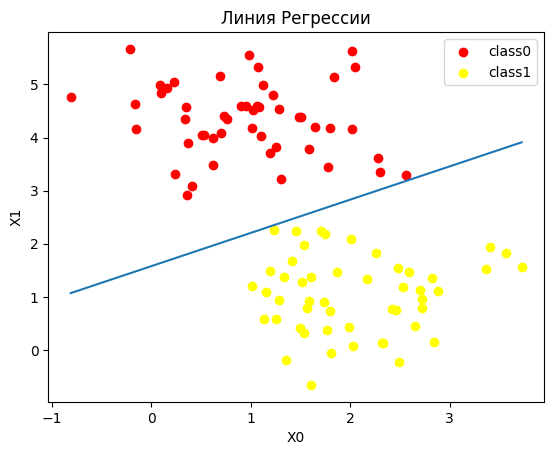

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0],  c='red',label='class0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1],  c='yellow',label='class1')
plt.plot(x0_lim, -(log_reg.w[0] + log_reg.w[1] * x0_lim) / log_reg.w[2])
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.title("Линия Регрессии")
plt.show()

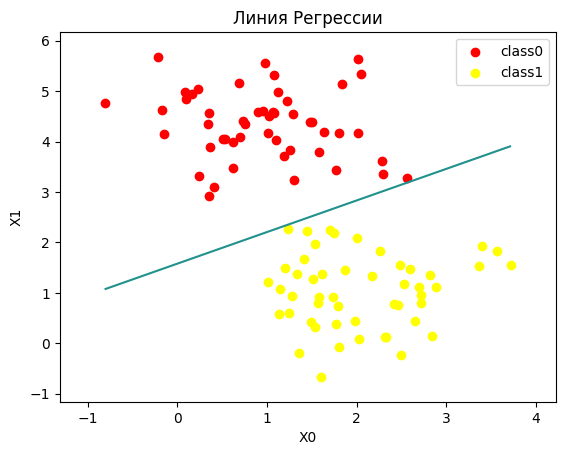

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0],  c='red',label='class0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1],  c='yellow',label='class1')
plt.contour(x0_grid, x1_grid, z_grid, levels=0)
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.xlim(X[:,0].min()-0.5,X[:,0].max()+0.5)
plt.ylim(X[:,1].min()-0.5,X[:,1].max()+0.5)
plt.title("Линия Регрессии")
plt.show()

### 11. Создайте новое наблюдение, например, взяв медианное значение по каждому столбцу X. Сделайте предсказание на нём.
Указание: Обртите внимание, что метод predict принимает только двумерные numpy-массивы.

In [ ]:
observation = np.array([np.median(X, axis =0)])
observation

array([[1.50093862, 2.58771414]])

In [ ]:
log_reg.predict(observation)

array([0])

### 12.Визуализируйте области разделения на классы и диаграмму рассеивания данных на одном графике. Изобразите точкой предсказанное значение. Убедитесь в том, что оно расположено в нужной области.
Указание: Области разделения на классы визуализируйте, используя [contourf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html).

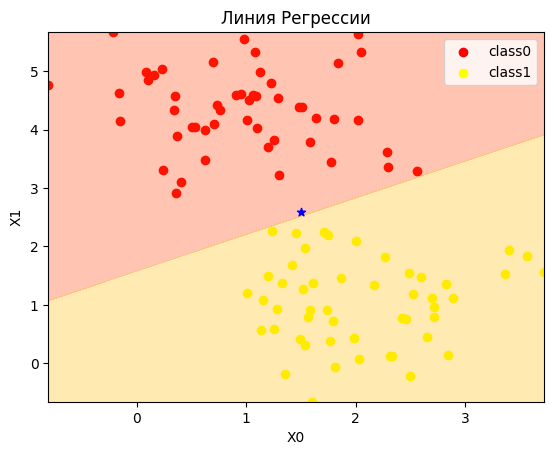

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0],  c='red',label='class0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1],  c='yellow',label='class1')
plt.contourf(x0_grid, x1_grid, z_grid, levels=0, alpha = 0.3, cmap = 'autumn')
plt.scatter(observation[:, 0], observation[:, 1], color="blue", marker="*")
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1')
plt.title("Линия Регрессии")
plt.show()

### 13. Сгенерируйте данные и значения целевой переменной для задачи классификации с 3 признаками и 100 наблюдениями. Представьте признаки в виде датафрейма и выведите его первые 10 строк и описательную статистику. Целевую переменную представьте в виде серии и выведите количество элементов в каждом классе.

In [ ]:
X, y = make_blobs(n_samples = 100, centers = 2,
               cluster_std = 0.7, n_features = 3,
                  random_state=0)

In [ ]:
pd.DataFrame(X, columns=['x1', 'x2', 'x3']).head(10)

,x1,x2,x3
0,1.323854,-2.258581,3.765684
1,1.686309,-2.282856,2.114654
2,1.170729,-1.983590,2.644215
3,1.773851,3.439409,2.336907
4,0.959559,-1.744524,2.986062
5,2.336805,4.014254,1.532049
6,0.868084,-2.196066,2.675695
7,0.669618,3.426831,2.599511
8,1.247102,3.946224,1.228825
9,0.496903,3.694229,1.650073


In [ ]:
pd.Series(y).value_counts()

,count
1,50
0,50


### 14. Визуализируйте данные с тремя признаками на пространственной диаграмме рассеивания. Поверните график на нужный угол так, чтобы было видно, что данные линейно разделимы.

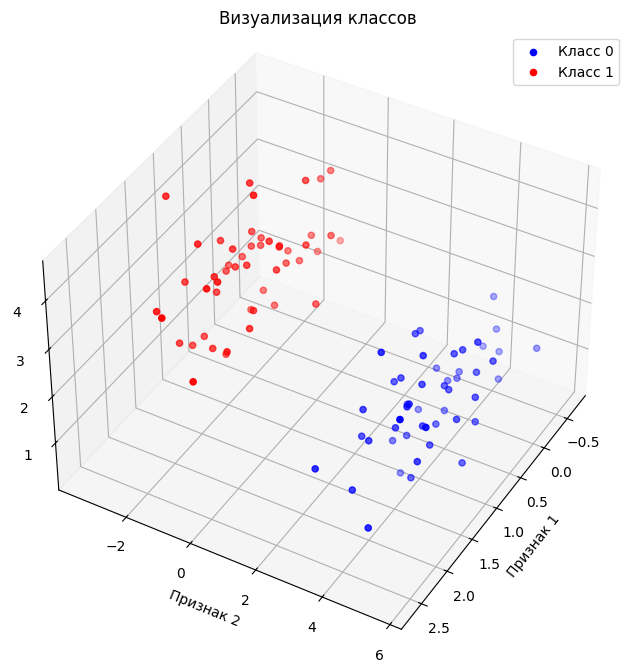

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0][y == 0], X[:, 1][y == 0], X[:, 2][y == 0], color='b', label='Класс 0')
ax.scatter(X[:, 0][y == 1], X[:, 1][y == 1], X[:, 2][y == 1], color='r', label='Класс 1')

ax.set_xlabel('Признак 1')
ax.set_ylabel('Признак 2')
ax.set_zlabel('Признак 3')
ax.set_title('Визуализация классов')
ax.legend()

ax.view_init(elev=40, azim=30)
plt.show()

### 15. Напишите функцию, вычисляющую предсказание вероятности того, что значение принадлежит классу единица в случае, когда три признака. Назовите её predict_proba. Вычислите её значения на сгенерированных данных X в случайной точке $w$.
Указание:  $\vec{p} =\sigma(w_0 + w_1 \vec{x}_1+ w_2 \vec{x}_2)$

In [ ]:
def predict_proba(w, X):
        return sigmoid(w[0]+w[1]*X[:,0]+w[2]*X[:,1]+w[3]*X[:,2])

W0 = np.random.rand(4)
predict_proba(W0,X)

array([0.70754396, 0.56721931, 0.63222274, 0.99576326, 0.69273071,
       0.99714226, 0.55737291, 0.99372268, 0.99427913, 0.99172363,
       0.59824611, 0.9961049 , 0.99282815, 0.99903939, 0.44436801,
       0.99886601, 0.99427393, 0.99795349, 0.99728389, 0.71292717,
       0.52645745, 0.99848037, 0.73183139, 0.64866582, 0.68216649,
       0.86586351, 0.98931947, 0.84352816, 0.52545528, 0.9965841 ,
       0.56842535, 0.59375813, 0.9944613 , 0.99840992, 0.9948617 ,
       0.99100089, 0.99498123, 0.99896807, 0.99615302, 0.99511745,
       0.98881316, 0.75347104, 0.99350645, 0.79694321, 0.99853657,
       0.85377252, 0.85422319, 0.61043154, 0.64811438, 0.99517161,
       0.99408983, 0.67399617, 0.70069158, 0.9991646 , 0.73410637,
       0.991785  , 0.53748414, 0.83687504, 0.99957096, 0.99802197,
       0.61147038, 0.99804044, 0.99836694, 0.83635325, 0.606888  ,
       0.82311926, 0.99754054, 0.99792528, 0.64242828, 0.99701454,
       0.99675243, 0.99776162, 0.99862396, 0.99804758, 0.86015

### 16. Напишите функцию gradient_logLoss, которая вычисляет градиент функции ошибки логистической регрессии с тремя признаками.

Указание: $$ \frac{\partial }{\partial w_0}loss(\vec w, X , \vec y) =\frac{1}{n}\sum_{i=1}^{n} (\sigma(w_0 + w_1 x_{i 1}+ w_2 x_{i 2}+ w_3 x_{i 3}) - {y}_i)$$
$$\frac{\partial }{\partial w_1}loss(\vec w, X, \vec y) =\frac{1}{n}\sum_{i=1}^{n} (\sigma(w_0 + w_1 x_{i 1}+ w_2 x_{i 2}) - {y}_i){x}_{i 1}$$
$$\frac{\partial }{\partial w_2}loss(\vec w, X, \vec y) =\frac{1}{n}\sum_{i=1}^{n} (\sigma(w_0 + w_1 x_{i 1}+ w_2 x_{i 2}) - {y}_i){x}_{i 2}$$
$$\frac{\partial }{\partial w_3}loss(\vec w, X, \vec y) =\frac{1}{n}\sum_{i=1}^{n} (\sigma(w_0 + w_1 x_{i 1}+ w_2 x_{i 2}) - {y}_i){x}_{i 3}$$

In [ ]:
def gradient_logLoss(w, X, y):
    return np.array([np.mean(predict_proba(w, X) - y), np.mean((predict_proba(w, X) - y)*X[:, 0]),  np.mean((predict_proba(w, X) - y)*X[:, 1]), np.mean((predict_proba(w, X) - y)*X[:, 2])])

In [ ]:
gradient_logLoss(W0, X, y)

array([0.34353157, 0.43285966, 2.47863092, 0.55346463])

### 17. Постройте модель логистической регрессии с тремя признаками в виде класса, назовите его Logistic_Regression_dim3.  Обучите построенную модель и выведите оптимальные параметры гиперплоскости.
Указание: Преобразуйте класс Logistic_Regression_dim2 так, чтобы он мог быть применим к данным с тремя признаками. Замените нужным образом методы gradient_F и predict_proba, а в fit стартовую точку возьмите, состоящую из четырёх нулей.

In [ ]:
class Logistic_Regression_dim3():
    def __init__(self, max_iter):
        self.w = None
        self.max_iter_ = max_iter

    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def predict_proba(self, X):
        return self.sigmoid(self.w[0]+self.w[1]*X[:,0]+self.w[2]*X[:,1]+self.w[3]*X[:,2])

    def gradient_F(self, X, y):
        return np.array([np.mean(self.predict_proba(X) - y), np.mean((self.predict_proba(X) - y)*X[:, 0]),  np.mean((self.predict_proba(X) - y)*X[:, 1]), np.mean((self.predict_proba(X) - y)*X[:, 2])])

    def GD(self, a, b, w_start, learning_rate=100):
        self.w = w_start

        for _ in range(self.max_iter_):
            self.w = self.w - learning_rate *self.gradient_F(a, b)
        assert (-1e+06 < self.w).all() and (self.w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
        assert (-1e-04 < self.gradient_F(a, b)).all() and (self.gradient_F(a, b) < 1e-04).all(), "Недостаточно шагов градиентного спуска"

    def fit(self, a, b):
        w_start = np.zeros(4)
        self.GD(a, b, w_start)

    def predict(self, X):
        return np.where(self.predict_proba(X) > 0.5, 1, 0)

In [ ]:
log_reg_dim3 = Logistic_Regression_dim3(1000)
log_reg_dim3.fit(X, y)
log_reg_dim3.predict(X)

<ipython-input-362-06f074b829e2>:7: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

### 18. Визуализируйте плоскость разделения на классы и диаграмму рассеивания на одном пространственном графике. Поверните график на нужный угол так, чтобы было видно, что данные разделены плоскостью.

In [ ]:
x0_lim = np.linspace(X[:,0].min(),X[:,0].max(), 100)
x1_lim = np.linspace(X[:,1].min(),X[:,1].max(), 100)
x0_grid, x1_grid = np.meshgrid(x0_lim, x1_lim)
z_grid = log_reg_dim3.w[0] + log_reg_dim3.w[1] * x0_grid + log_reg_dim3.w[2] * x1_grid

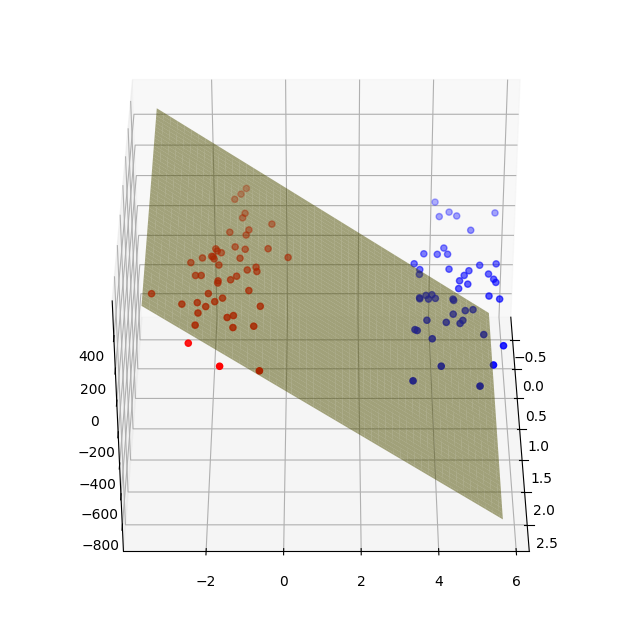

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0][y == 0], X[:, 1][y == 0], X[:, 2][y == 0], color='b', label='Класс 0')
ax.scatter(X[:, 0][y == 1], X[:, 1][y == 1], X[:, 2][y == 1], color='r', label='Класс 1')
ax.plot_surface(x0_grid, x1_grid, z_grid, alpha=0.5, color='y')
ax.view_init(elev=35, azim=0)